In [ ]:
# STEP 1: Import needed libraries
from google.colab import files
uploaded = files.upload()
import pandas as pd

# STEP 2: Load the CSV file
df = pd.read_csv("KaggleV2-May-2016 2.csv")

# STEP 3: Show the first few rows
df.head()


Saving KaggleV2-May-2016 2.csv to KaggleV2-May-2016 2.csv


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# Show all column names
print(df.columns)

# Rename columns to remove spaces and make them easier to use
df.columns = [col.strip().replace('-', '_').replace(' ', '_') for col in df.columns]

# Show updated column names
print("Renamed columns:\n", df.columns)


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')
Renamed columns:
 Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')


In [ ]:
# See if there are any missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Check strange values (like negative age)
print("Minimum age:", df['Age'].min())


Missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64
Duplicate rows: 0
Minimum age: -1


In [ ]:
# See if there are any missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Check strange values (like negative age)
print("Minimum age:", df['Age'].min())


Missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64
Duplicate rows: 0
Minimum age: -1


In [ ]:
# Remove age rows that are negative (invalid)
df = df[df['Age'] >= 0]

# Drop columns we don’t need for prediction
df = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1)

# Convert 'No_show' from 'Yes'/'No' to 1 and 0
df['No_show'] = df['No_show'].map({'Yes': 1, 'No': 0})

# Double-check the new data
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [ ]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make graphs look nice
sns.set(style="whitegrid")


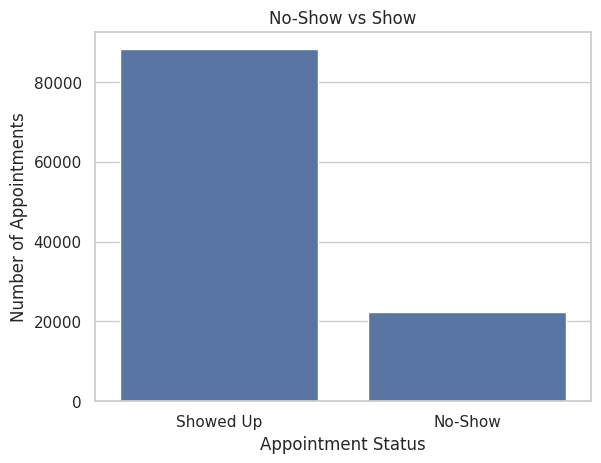

In [ ]:
# Count of show vs no-show
sns.countplot(x='No_show', data=df)
plt.title('No-Show vs Show')
plt.xticks([0, 1], ['Showed Up', 'No-Show'])
plt.xlabel('Appointment Status')
plt.ylabel('Number of Appointments')
plt.show()


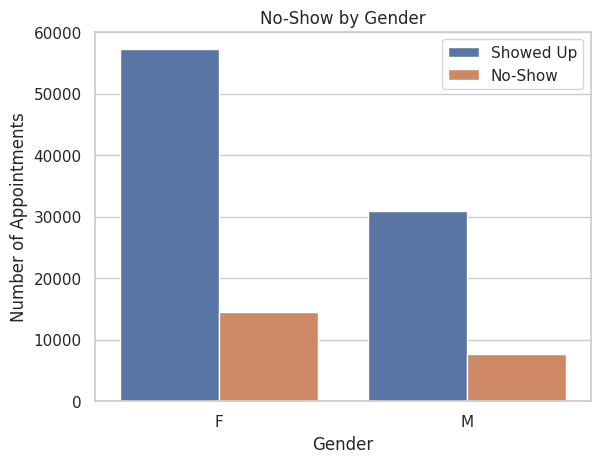

In [ ]:
sns.countplot(x='Gender', hue='No_show', data=df)
plt.title('No-Show by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Appointments')
plt.legend(['Showed Up', 'No-Show'])
plt.show()


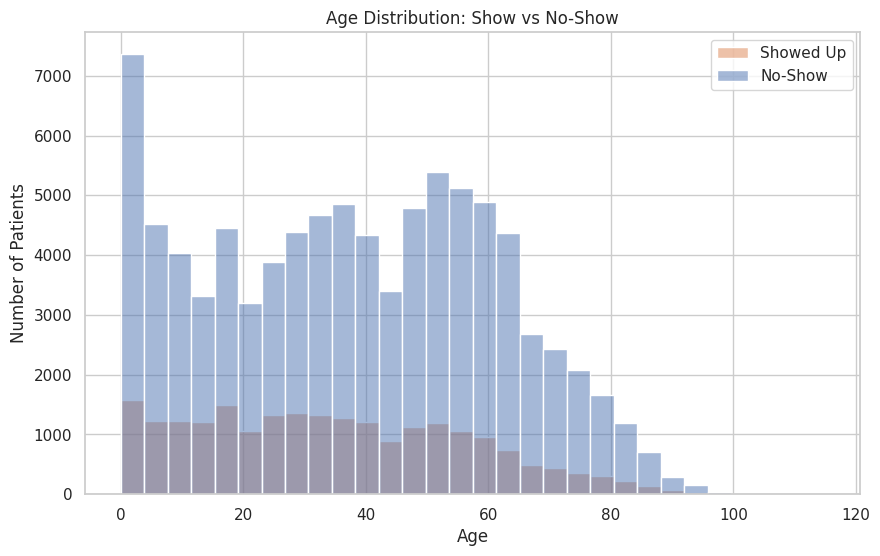

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='No_show', bins=30, kde=False)
plt.title('Age Distribution: Show vs No-Show')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(['Showed Up', 'No-Show'])
plt.show()


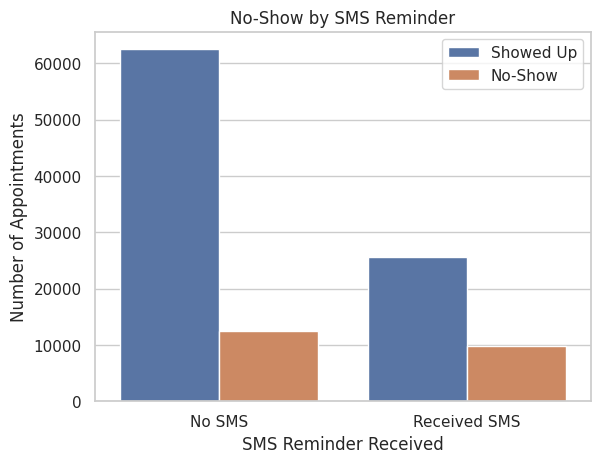

In [ ]:
#4. Do SMS reminders help?

sns.countplot(x='SMS_received', hue='No_show', data=df)
plt.title('No-Show by SMS Reminder')
plt.xlabel('SMS Reminder Received')
plt.ylabel('Number of Appointments')
plt.xticks([0, 1], ['No SMS', 'Received SMS'])
plt.legend(['Showed Up', 'No-Show'])
plt.show()


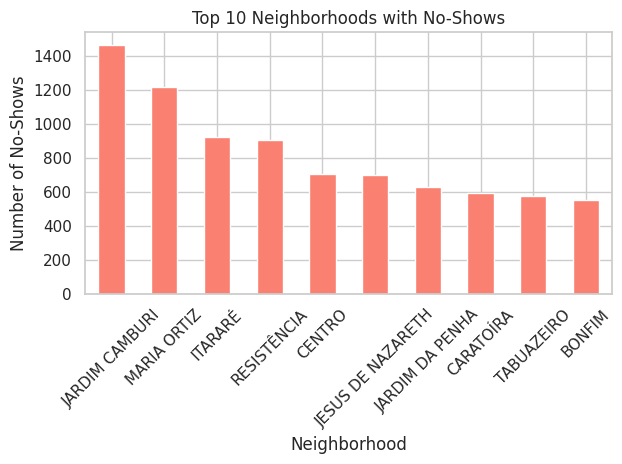

In [ ]:
# Top 10 neighborhoods with most no-shows
no_show_by_area = df[df['No_show'] == 1]['Neighbourhood'].value_counts().head(10)

no_show_by_area.plot(kind='bar', color='salmon')
plt.title('Top 10 Neighborhoods with No-Shows')
plt.ylabel('Number of No-Shows')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Pick columns to use for prediction (X) and the outcome (y)
features = ['Age', 'Gender', 'Scholarship', 'Hipertension', 'Diabetes',
            'Alcoholism', 'SMS_received', 'Handcap']

X = df[features]
y = df['No_show']


In [ ]:
# Convert Gender from 'F'/'M' to 0/1
X['Gender'] = X['Gender'].map({'F': 0, 'M': 1})


/tmp/ipython-input-16-2300123455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].map({'F': 0, 'M': 1})


In [ ]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix: shows how many correct/wrong predictions
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed report: precision, recall, f1-score
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8013661449380258
Confusion Matrix:
 [[17715     0]
 [ 4391     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     17715
           1       0.00      0.00      0.00      4391

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Save cleaned data to CSV for Tableau
df.to_csv("no_show_cleaned.csv", index=False)
